# Boston House Price Prediction


**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
**References**

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

In [2]:
# Direct data, target loading as np array
#X, y = load_boston(return_X_y=True)

boston_original = load_boston()
boston_original.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
feature_names = ["crime_rate", "land_zone", "non_retail_zones","char_river","nox_concentre",
    "rooms_per_household", "age", "dis_to_employement", "acces_to_radial", "tax",
    "pup_to_teach", "black_ratio","low_class", "median_value"]

In [4]:
dataset_np = np.c_[boston_original.data, boston_original.target]

In [9]:
boston_df = pd.DataFrame(data=dataset_np, columns=feature_names)
boston_df.info()
boston_df.describe()
boston_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crime_rate             506 non-null float64
land_zone              506 non-null float64
non_retail_zones       506 non-null float64
char_river             506 non-null float64
nox_concentre          506 non-null float64
rooms_per_household    506 non-null float64
age                    506 non-null float64
dis_to_employement     506 non-null float64
acces_to_radial        506 non-null float64
tax                    506 non-null float64
pup_to_teach           506 non-null float64
black_ratio            506 non-null float64
low_class              506 non-null float64
median_value           506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


,crime_rate,land_zone,non_retail_zones,char_river,nox_concentre,rooms_per_household,age,dis_to_employement,acces_to_radial,tax,pup_to_teach,black_ratio,low_class,median_value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
corr_matrix = boston_df.corr()
corr_matrix["median_value"].sort_values(ascending=False)

median_value           1.000000
rooms_per_household    0.695360
land_zone              0.360445
black_ratio            0.333461
dis_to_employement     0.249929
char_river             0.175260
age                   -0.376955
acces_to_radial       -0.381626
crime_rate            -0.388305
nox_concentre         -0.427321
tax                   -0.468536
non_retail_zones      -0.483725
pup_to_teach          -0.507787
low_class             -0.737663
Name: median_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb360276dd0>,
      dtype=object)

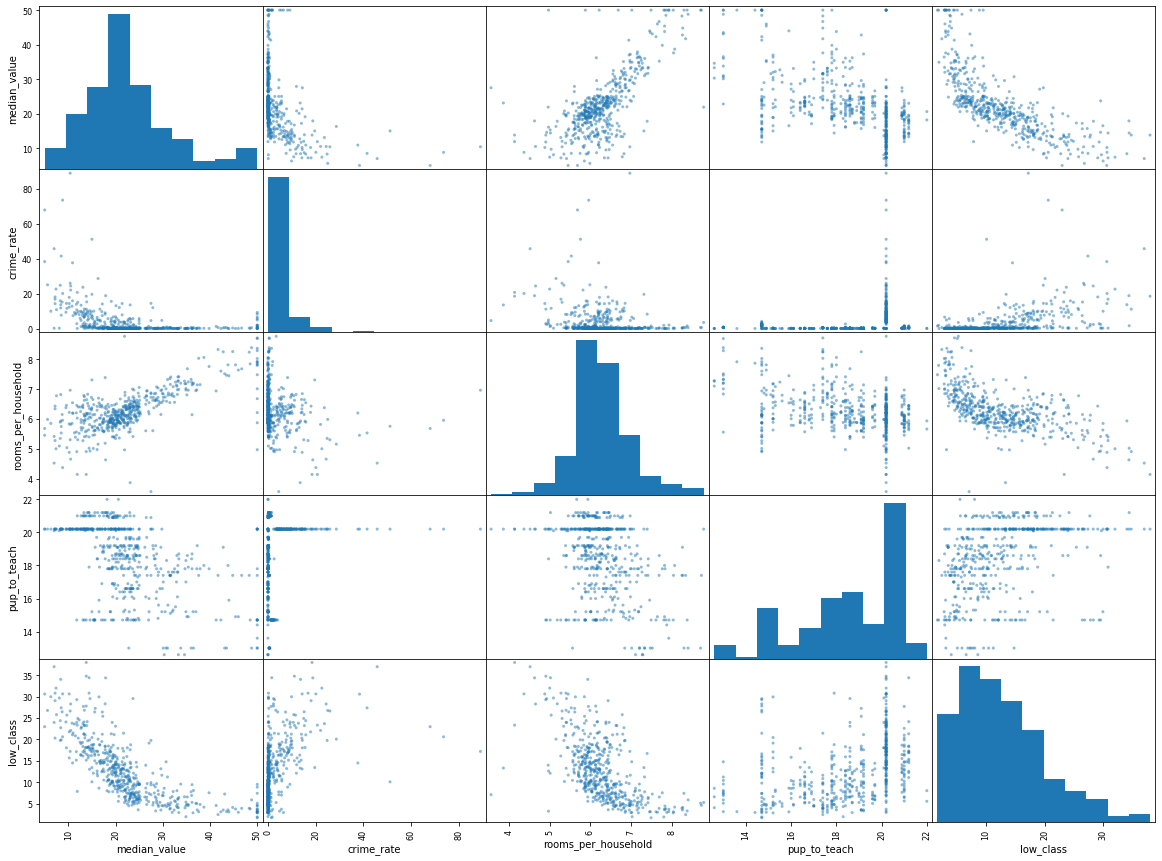

In [18]:
from pandas.plotting import scatter_matrix

attributes = ["median_value", "crime_rate", 
              "rooms_per_household","pup_to_teach","low_class"]

scatter_matrix(boston_df[attributes], figsize=(20,15))

